In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rnd
%matplotlib inline

# Задание №1

In [2]:
mu = 0.0
sigma = 2.0
data_first = mu + sigma * rnd.standard_normal(1000)
data_second = rnd.uniform(-0.5, 0.5, 1000)

In [3]:
data_result = map(lambda x, y: x + y, data_first, data_second)

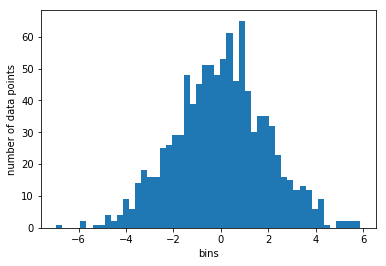

In [4]:
a = plt.hist(data_result, bins = 50)
plt.xlabel('bins')
plt.ylabel('number of data points')

# Задание №2

## Пример декоратора функции

### Декоратор выводящий время, которое заняло выполнение декорируемой функции


\*args - неопределенное количество позиционных аргументов,  
\**kwargs - неопределенное количество именованных аргументов.
  
Эти конструкции служат для передачи в функцию неопределенное количество аргументов

In [5]:
import time
def simple_timer(func):
    def wrapper(*args, **kwargs):
        t = time.time()
        res = func(*args, **kwargs)
        print "Время выполнения функции {0}: {1}".format(func.__name__, (time.time()-t))

    return wrapper

In [6]:
@simple_timer
def deg(x):
    return x ** 190000

deg(100)

Время выполнения функции deg: 0.233999967575


In [7]:
def timer_benchmark(func):
    def wrapper(*args, **kwargs):
        t = time.time()
        res = func(*args, **kwargs)
        
        #Вывод названия функции, времени выполнения, 
        #значения аргументов, названия именованных аргументов, 
        #результата выполнения
        print "Время выполнения функции {0}: {1}".format(func.__name__, (time.time()-t))
        print args, kwargs
        return res

    return wrapper

In [8]:
@timer_benchmark
def reverse_string(string):
    return ''.join(reversed(string))

@timer_benchmark
def strange_summ(*args, **kwargs):
    res = 0
    for num in args:
        res += num
    for key in kwargs:
        res += kwargs[key]
    return res

print reverse_string("one two three four five")
list_of_numbers = [20,10,30]
dict_of_arguments = {"arg_one":15, "arg_two":25, "arg_three":35}
print strange_summ(*list_of_numbers,**dict_of_arguments)

Время выполнения функции reverse_string: 0.0
('one two three four five',) {}
evif ruof eerht owt eno
Время выполнения функции strange_summ: 0.0
(20, 10, 30) {'arg_two': 25, 'arg_three': 35, 'arg_one': 15}
135


### Декоратор, логирующий работу кода

In [9]:
def logging(func):
    def wrapper(*args, **kwargs):
        res = func(*args, **kwargs)
        print (func.__name__, args, kwargs)
        return res
    return wrapper


In [10]:
@logging
def reverse_string(string):
    return ''.join(reversed(string))

@logging
def another_strange_summ(*args, **kwargs):
    res = 0
    for num in args:
        res += num
    for key in kwargs:
        res += kwargs[key]
    if res > 100:
        return another_strange_summ(*[0, 0, 10])
    return res

print reverse_string("one two three four five")
list_of_numbers = [20, 10, 30]
dict_of_arguments = {"arg_one":15, "arg_two":25, "arg_three":35}
print another_strange_summ(*list_of_numbers,**dict_of_arguments)

('reverse_string', ('one two three four five',), {})
evif ruof eerht owt eno
('another_strange_summ', (0, 0, 10), {})
('another_strange_summ', (20, 10, 30), {'arg_two': 25, 'arg_three': 35, 'arg_one': 15})
10


### Декоратор, считающий и выводящий количество вызовов декорируемой функции

In [11]:
def counter(func):
    def wrapper(*args, **kwargs):
        wrapper.count += 1
        res = func(*args, **kwargs)
        print("{0} была вызвана : {1}х".format(func.__name__, wrapper.count))
        return res
    wrapper.count = 0
    return wrapper
    

In [12]:
@counter
def reverse_string(string):
    return ''.join(reversed(string))

@counter
def another_strange_summ(*args, **kwargs):
    res = 0
    for num in args:
        res += num
    for key in kwargs:
        res += kwargs[key]
    if res > 100:
        return another_strange_summ(*[0, 0, 10])
    return res

print reverse_string("one two three four five")
list_of_numbers = [20, 10, 30]
dict_of_arguments = {"arg_one":15, "arg_two":25, "arg_three":35}
print another_strange_summ(*list_of_numbers,**dict_of_arguments)

reverse_string была вызвана : 1х
evif ruof eerht owt eno
another_strange_summ была вызвана : 2х
another_strange_summ была вызвана : 2х
10


### Декоратор кэширующий

In [13]:
def memoized(func):
    memory = {}

    def wrapper(*args, **kwargs):
        key = (tuple(args), hash(tuple(sorted(kwargs.items()))))
        if not key in memory:
            memory[key] = func(*args, **kwargs)
        return memory[key]
    return wrapper

In [14]:
@memoized
def factorial (n):
    print "factorial (%d)" % n
    if n is 0:
        return 1
    else:
        return factorial(n - 1) * n

In [15]:
factorial(3)

factorial (3)
factorial (2)
factorial (1)
factorial (0)


6

## Пример класса

In [16]:
class Person:
 
    # конструктор
    def __init__(self, name):
        self.name = name
 
    def display_info(self):
        print("Person name is", self.name)


person= Person("Mary")
person.display_info() 

('Person name is', 'Mary')


## Пример декоратора метода

In [17]:
def transformer_decorator(func):
    def wrapper(self, change):
        return func(self, change)
    return wrapper

class Person:
 
    # конструктор
    def __init__(self, name, age):
        self.name = name
        self.age = age
 
    def display_info(self):
        print("Person name is", self.name, self.age)
    @transformer_decorator  
    def transform_age(self, change):
        print self.age + change


person = Person("Mary", 100)
person.display_info() 
person.transform_age(-78)

('Person name is', 'Mary', 100)
22
